In [3]:
import math
# import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

In [4]:
##Verify Example 3.12 (p117)
n=15
A=np.zeros((n,n))
M=np.zeros((n,n))
for i in range(n):
    for j in range (n):
        A[i,j]=1/(i+j+1)

b=np.dot(A,np.ones((n,1)))


for i in range(n-1):

    colomlist=A[i:n,i].tolist()

    max_index = colomlist.index(max(colomlist))
    A[[i,max_index+i],:]=A[[max_index+i,i],:]
    b[[i,max_index+i],:]=b[[max_index+i,i],:]

    for j in range(i+1,n):
        M[j,i]=A[j,i]/A[i,i]

        for k in range(i,n):
            A[j,k]=A[j,k]-M[j,i]*A[i,k]
        
        b[j,0]=b[j,0]-M[j,i]*b[i,0]


x=np.zeros((n,1))    
for i in reversed(range(n)):
    x[i,0]=b[i,0]/A[i,i]
    b=b-A[:,i].reshape((n,1))*x[i,0]

err = 0
for i in range(n):
    err += (x[i] - 1.0) * (x[i] - 1.0)
err = math.sqrt(err)
err /= math.sqrt(n)

print("relative error GEM:", err)


n=15
A=np.zeros((n,n))
for i in range(n):
    for j in range (n):
        A[i,j]=1/(i+j+1)
b=np.dot(A,np.ones((n,1)))
u,sigma,vt = np.linalg.svd(A)
S=np.zeros((n,n))
for i in range(n):
    if sigma[i]> 0.00000000000001:
        S[i,i]=1.0/sigma[i]
pseudoinverse = np.dot(np.dot(vt.T,S),u.T)
x = np.dot(pseudoinverse,b)

err = 0
for i in range(n):
    err += (x[i] - 1.0) * (x[i] - 1.0)
err = math.sqrt(err)
err /= math.sqrt(n)

print("relative error SVD:", err)

relative error GEM: 4.09501878135298
relative error SVD: 0.002519416612340321


In [5]:
##第四题
A=np.zeros((10,10))
for i in range(10):
    A[i,i]=10

for i in range(1,10):
    A[i,i-1]=-1
    A[i-1,i]=-1

for i in range(2,10):
    A[i,i-2]=-1
    A[i-2,i]=-1

# print(A)
D=8*np.eye(10)
N=np.triu(A,1)+np.eye(10)
M=np.tril(A,-1)+np.eye(10)


# Method 1
B_1=np.dot(np.linalg.inv(M+D),N)
e,v=np.linalg.eig(B_1)
print("spectral radii of Method 1 is "+str(max(abs(e))))

# Method 2
B_2=np.dot(np.linalg.inv(D),M+N)
e,v=np.linalg.eig(B_2)
print("spectral radii of Method 2 is "+str(max(abs(e))))

# Method 3
B_3=np.dot(np.linalg.inv(M+N),D)
e,v=np.linalg.eig(B_3)
print("spectral radii of Method 3 is "+str(max(abs(e))))


spectral radii of Method 1 is 0.1450395497753535
spectral radii of Method 2 is 0.5
spectral radii of Method 3 is 12.28702347495569


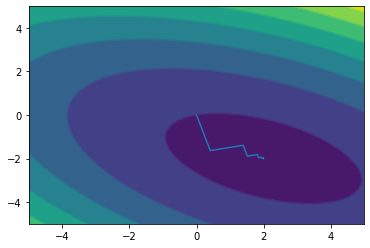

In [6]:
## T11
## GD is convregent becasu A is s.p.d
A=np.array([(3,2),(2,6)])
b=np.array([(2,-8)]).T
A_inv=np.linalg.inv(A)
x=np.dot(A_inv,b)

x_record=[]

x=np.array([(0.,0.)]).T
for i in range(20):
    x_record.append(x.T)
    r=b-np.dot(A,x)
    alpha=(np.dot(r.T,r))/(np.dot(np.dot(r.T,A),r))
    x=x+alpha*r
    

x_record=np.array(x_record).reshape(20,2)

x_1=x_record[:,0]
x_2=x_record[:,1]
phi=[]
for i in range(20):
    x=x_record[i,:].T
    temp=np.dot(np.dot(x.T,A),x)*0.5-np.dot(x.T,b)
    phi.append(temp)

# phi=np.array(phi).reshape(20,1)
step = 0.01
x = np.arange(-5,5,step)
y = np.arange(-5,5,step)
X,Y = np.meshgrid(x,y)
Z = (3*X*X+6*Y*Y+4*X*Y)/2-2*X+8*Y
plt.contourf(X,Y,Z)
plt.contour(X,Y,Z)
plt.plot(x_1,x_2)
plt.show()

In [7]:
###Example 4.5
dataFile = 'C:/Users/shark/Desktop/test/A.mat'
data = scio.loadmat(dataFile)
A=data['A'].toarray()

def L_2_norm(M):
    e,v=np.linalg.eig(M.T@M)
    e=math.sqrt(max(e))
    return e

def ilup(A_f,p):
    A=A_f.copy()
    n=A.shape[0]
    lev=666*np.ones(A.shape)
    lev[A!=0]=0
   
    
    for i in range(1,n):
        for k in range(0,i):
            if lev[i,k]<=p:
                if A[k,k]!=0:
                    A[i,k]=A[i,k]/A[k,k]
        
                    for j in range(k+1,n):
                
                        A[i,j]=A[i,j]-A[i,k]*A[k,j]
                        if A[i,j]!=0:
                            lev[i,j]=min(lev[i,j],lev[i,k]+lev[k,j]+1)

        for j in range(n):
            if lev[i,j]> p:
                A[i,j]=0
    
  
    return np.tril(A,-1)+np.eye(n), np.triu(A,0), np.dot(np.tril(A,-1)+np.eye(n),np.triu(A,0))



L,U,P=ilup(A,0)
P_inv_A=np.linalg.inv(P)@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" ILU(0)'s K_2(P_inv*A) is " +str(K_1*K_2))

L,U,P=ilup(A,1)
P_inv_A=np.linalg.inv(P)@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" ILU(1)'s K_2(P_inv*A) is " +str(K_1*K_2))

L,U,P=ilup(A,2)
P_inv_A=np.linalg.inv(P)@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" ILU(2)'s K_2(P_inv*A) is " +str(K_1*K_2))

L,U,P=ilup(A,3)
P_inv_A=np.linalg.inv(P)@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" ILU(3)'s K_2(P_inv*A) is " +str(K_1*K_2))



def Neumann(A_f,p):
    A=A_f.copy()
    n=A.shape[0]
    D=np.diag(np.diag(A))
    C=D-A
    D_inv=0.25*np.eye(n)
    C_D_inv=C@D_inv
    # print(D_inv)
    if p==0:
        P=D_inv
    
    if p==1:
        P=D_inv@(np.eye(n)+C_D_inv)

    if p==2:
        P=D_inv@(np.eye(n)+C_D_inv+C_D_inv@C_D_inv)

    if p==3:
        P=D_inv@(np.eye(n)+C_D_inv+C_D_inv*C_D_inv+C_D_inv@C_D_inv@C_D_inv)

    return P

P_inv=Neumann(A,0)
P_inv_A=P_inv@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" Neumann(0)'s K_2(P_inv*A) is " +str(K_1*K_2))

P_inv=Neumann(A,1)
P_inv_A=P_inv@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" Neumann(1)'s K_2(P_inv*A) is " +str(K_1*K_2))

P_inv=Neumann(A,2)
P_inv_A=P_inv@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" Neumann(2)'s K_2(P_inv*A) is " +str(K_1*K_2))

P_inv=Neumann(A,3)
P_inv_A=P_inv@A
K_1=L_2_norm(P_inv_A)
P_inv_A=np.linalg.inv(P_inv_A)
K_2=L_2_norm(P_inv_A)
print(" Neumann(3)'s K_2(P_inv*A) is " +str(K_1*K_2))


 ILU(0)'s K_2(P_inv*A) is 22.328292064087805
 ILU(1)'s K_2(P_inv*A) is 11.984689175511987
 ILU(2)'s K_2(P_inv*A) is 8.604697844505578
 ILU(3)'s K_2(P_inv*A) is 5.639839093103569
 Neumann(0)'s K_2(P_inv*A) is 145.64157866809714
 Neumann(1)'s K_2(P_inv*A) is 36.912111209802326
 Neumann(2)'s K_2(P_inv*A) is 48.55329605666577
 Neumann(3)'s K_2(P_inv*A) is 411.568019961334


In [8]:
###Example 4.6
dataFile = 'C:/Users/shark/Desktop/test/A16.mat'
data = scio.loadmat(dataFile)
A_s=data['A'].toarray()
n_s=A_s.shape[0]
b_s=A_s@np.ones((n_s,1))


num_itr_max=200
tol=math.pow(10,-10)
L,U,P=ilup(A_s,0)
P_inv=np.linalg.inv(P)
bnorm=1
x=np.zeros((n_s,1))
r=b_s-A_s@x
relres=np.linalg.norm(r)/bnorm
for i in range(num_itr_max):
    if relres<tol:
        print("Size 16*16 End at iter "+str(i))
        break
    
    z=P_inv@r
    rho=r.T@z
    q=A_s@z
    alpha=rho/(z.T@q)
    x=x+alpha*z
    r=r-alpha*q
    relres=np.linalg.norm(r)
    # print(relres)
    if i==num_itr_max-1:
        print( "Size 16*16 bDon't converge in num_itr_max")


dataFile = 'C:/Users/shark/Desktop/test/A400.mat'
data = scio.loadmat(dataFile)
A_L=data['A'].toarray()
n_L=A_L.shape[0]
b_L=A_L@np.ones((n_L,1))

num_itr_max=200
tol=math.pow(10,-11)
L,U,P=ilup(A_L,0)
P_inv=np.linalg.inv(P)
bnorm=1
x=np.zeros((n_L,1))
r=b_L-A_L@x
relres=np.linalg.norm(r)/bnorm
for i in range(num_itr_max):
    if relres<tol:
        print("Size 400*400 End at iter "+str(i))
        break
    
    z=P_inv@r
    rho=r.T@z
    q=A_L@z
    alpha=rho/(z.T@q)
    x=x+alpha*z
    r=r-alpha*q
    relres=np.linalg.norm(r)
    # print(relres)
    if i==num_itr_max-1:
        print( "Size 400*400 bDon't converge in num_itr_max")

Size 16*16 End at iter 18
Size 400*400 bDon't converge in num_itr_max


Size 16*16 End at iter 9
Size 400*400 End at iter 26


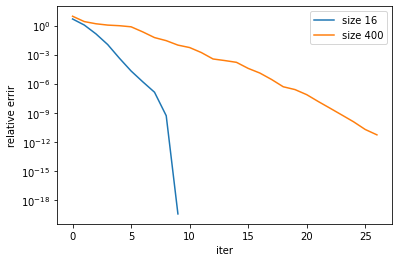

In [13]:
###Example 4.7 共轭梯度法
dataFile = 'C:/Users/shark/Desktop/test/A16.mat'
data = scio.loadmat(dataFile)
A_s=data['A'].toarray()
n_s=A_s.shape[0]
b_s=A_s@np.ones((n_s,1))


num_itr_max=200
tol=math.pow(10,-10)
L,U,P=ilup(A_s,0)
P_inv=np.linalg.inv(P)
bnorm=1
x=np.zeros((n_s,1))
r=b_s-A_s@x
relres=np.linalg.norm(r)/bnorm
r_record_16=[]
for i in range(num_itr_max):
    r_record_16.append(relres)
    if relres<tol:
        print("Size 16*16 End at iter "+str(i))
        break
    
    z=P_inv@r
    rho=r.T@z
    if i==0:
        p=z

    if i>=1:
        beta=rho/rho1
        p=z+beta*p
    
    q=A_s@p
    alpha=rho/(p.T@q)
    x=x+alpha*p
    r=r-alpha*q
    relres=np.linalg.norm(r)
    rho1=rho
    if i==num_itr_max-1:
        print( "Size 16*16 Don't converge in num_itr_max")


dataFile = 'C:/Users/shark/Desktop/test/A400.mat'
data = scio.loadmat(dataFile)
A_L=data['A'].toarray()
n_L=A_L.shape[0]
b_L=A_L@np.ones((n_L,1))

num_itr_max=200
tol=math.pow(10,-11)
L,U,P=ilup(A_L,0)
P_inv=np.linalg.inv(P)
bnorm=1
x=np.zeros((n_L,1))
r=b_L-A_L@x
relres=np.linalg.norm(r)/bnorm
r_record_400=[]
for i in range(num_itr_max):
    r_record_400.append(relres)
    if relres<tol:
        print("Size 400*400 End at iter "+str(i))
        break
    
    z=P_inv@r
    rho=r.T@z
    if i==0:
        p=z

    if i>=1:
        beta=rho/rho1
        p=z+beta*p
    
    q=A_L@p
    alpha=rho/(p.T@q)
    x=x+alpha*p
    r=r-alpha*q
    relres=np.linalg.norm(r)
    rho1=rho
    if i==num_itr_max-1:
        print( "Size 400*400 Don't converge in num_itr_max")
        


fig,ax=plt.subplots()
plt.plot(r_record_16,label="size 16")
plt.plot(r_record_400,label="size 400")
ax.set_yscale('log')
plt.ylabel('relative errir') # 横坐标轴的标题
plt.xlabel('iter') # 纵坐标轴的标题
plt.legend()
plt.show()

In [ ]:
##Implement Program 21 and 22, and verify Example 4.9.

n = 100
tol = 0.0000000001
#get A
A=np.zeros([n,n])
for i in range(n):
    A[i][i]=2
for i in range(n-1):
    A[i][i+1]=-1
for i in range(1,n):
    A[i][i-1]=-1
b=np.dot(A,np.ones([n]))
def GSarnoldi(A, m, k, V, H, n):
    k+=1
    H=np.dot(V,np.dpt(A,V))
    s=0
    for i in range(k):
        s+=H[i][k] *V[i]
    w=np.dot(A,V) - s
    k=m+1
    return K, V, H 

def arnoldialg(A, v, m, n):
    s=0
    for i in range(n):
        s+=v[i]*v[i]
    s/=math.sqrt(s)
    for i in range(n):
        v[i]/=s
    V=np.zeros([n])
    for i in range(n):
        V[i]=v[i]
    H=np.zeros([n,n])
    k=0
    while(k <= m-1):
        k, V, H = GSarnoldi(A, m, k, V, H, n)


x = np.zeros([n])
r = np.zeros([n])
r = b - np.dot(A,x)
ss = 0
for i in range(n):
    ss+=r[i]*r[i]
ss/=math.sqrt(ss)
nr0=ss
v1=r / nr0
V=v1
H=np.zeros([n,n])
iter=0
istop=0
while(iter<m && istop ==0):
    iter, V, H = GSarnoldi(A,m,iter,V,H,n)
    el = eye(nc)
    y = nr0*el/H
    res = H * abs(y*el)
    print(res)
    if(res<tol):
        istop =1
        break
    y = el*nr0/H
    x += np.dot(V,y)
 if(nr0):
     x = np.zeros([n])